### ME-371 Midterm assessment - Fall 2023 - Daniel Kim
#### Part 2

In [22]:
#question 2.1

import pandas as pd
URL = 'https://raw.githubusercontent.com/MasoudMiM/MECG_542/master/Manufacturing_Industry_Database/Manufacturing_Industry_Database.csv'
df = pd.read_csv(URL)

print ("There are",df["naics_title"].nunique(), "Unique NAICS industries represented in the dataset" )



There are 364 Unique NAICS industries represented in the dataset


In [23]:
#Question 2.2 
df.rename(columns={'naics_title':'NAICS Industry','emp': 'Employees'}, inplace=True)
#renaming the indexes to make it easier to read
df2 = df[df['year'] == 2018][['NAICS Industry', 'Employees']]
#filtering
df2 = df2.groupby('NAICS Industry').sum()
df2.reset_index(inplace=True)
df2 = df2.sort_values(by=['Employees'], ascending=False)
#sorting by highest number of employees
display(df2)

,NAICS Industry,Employees
19,All Other Plastics Product Manufacturing,379.2
60,Commercial Printing (except Screen and Books),315.6
267,Poultry Processing,233.1
164,Machine Shops,231.8
5,Aircraft Manufacturing,171.9
...,...,...
218,Other Apparel Knitting Mills,2.3
357,Women's Handbag and Purse Manufacturing,1.6
166,Malt Manufacturing,1.2
199,Newsprint Mills,1.1


In [10]:
#Question 2.3 
df3 = df[df['year'] == 2018][['NAICS Industry', 'pay']]
#filtering 
df3 = df3.groupby('NAICS Industry').sum()
#grouping by NAICS industry and resetting the index
df3.reset_index(inplace=True)
df3 = df3.sort_values(by=['pay'], ascending=False)
display("The industry with the highest total annual payroll in 2018 is:", df3.head(1))
#head(1) for highest one

'The industry with the highest total annual payroll in 2018 is:'

,NAICS Industry,pay
5,Aircraft Manufacturing,17366.5


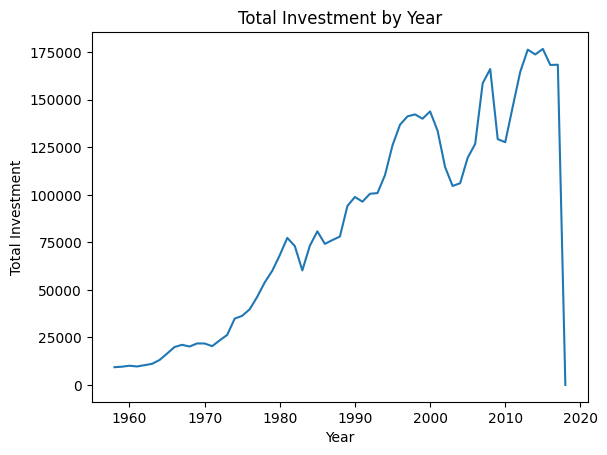

In [24]:
#Question 2.4 
import matplotlib.pyplot as plt 
df4 = df[['year', 'invest']]
#cutting the data to only contain the relevant columns
df4 = df4.groupby('year').sum()
#summing for total investment by year
df4.reset_index(inplace=True)
plt.plot(df4['year'],df4['invest']) 
plt.title('Total Investment by Year')
plt.xlabel('Year')
plt.ylabel('Total Investment')
plt.show()

In [26]:
#Question 2.5 
df5 = df[df['year'] == 2015][['NAICS Industry', 'tfp5']] 
#filtering by year and coloumn
df5 = df5.sort_values(by=['tfp5'], ascending=False)
#sorting
display("The industry with the highest 5-factor TFP index in 2015 is", 
        df5.head(1))

'The industry with the highest 5-factor TFP index in 2015 is'

,NAICS Industry,tfp5
6584,Petrochemical Manufacturing,1.987


Text(0, 0.5, 'Distribution of Production Worker Wages')

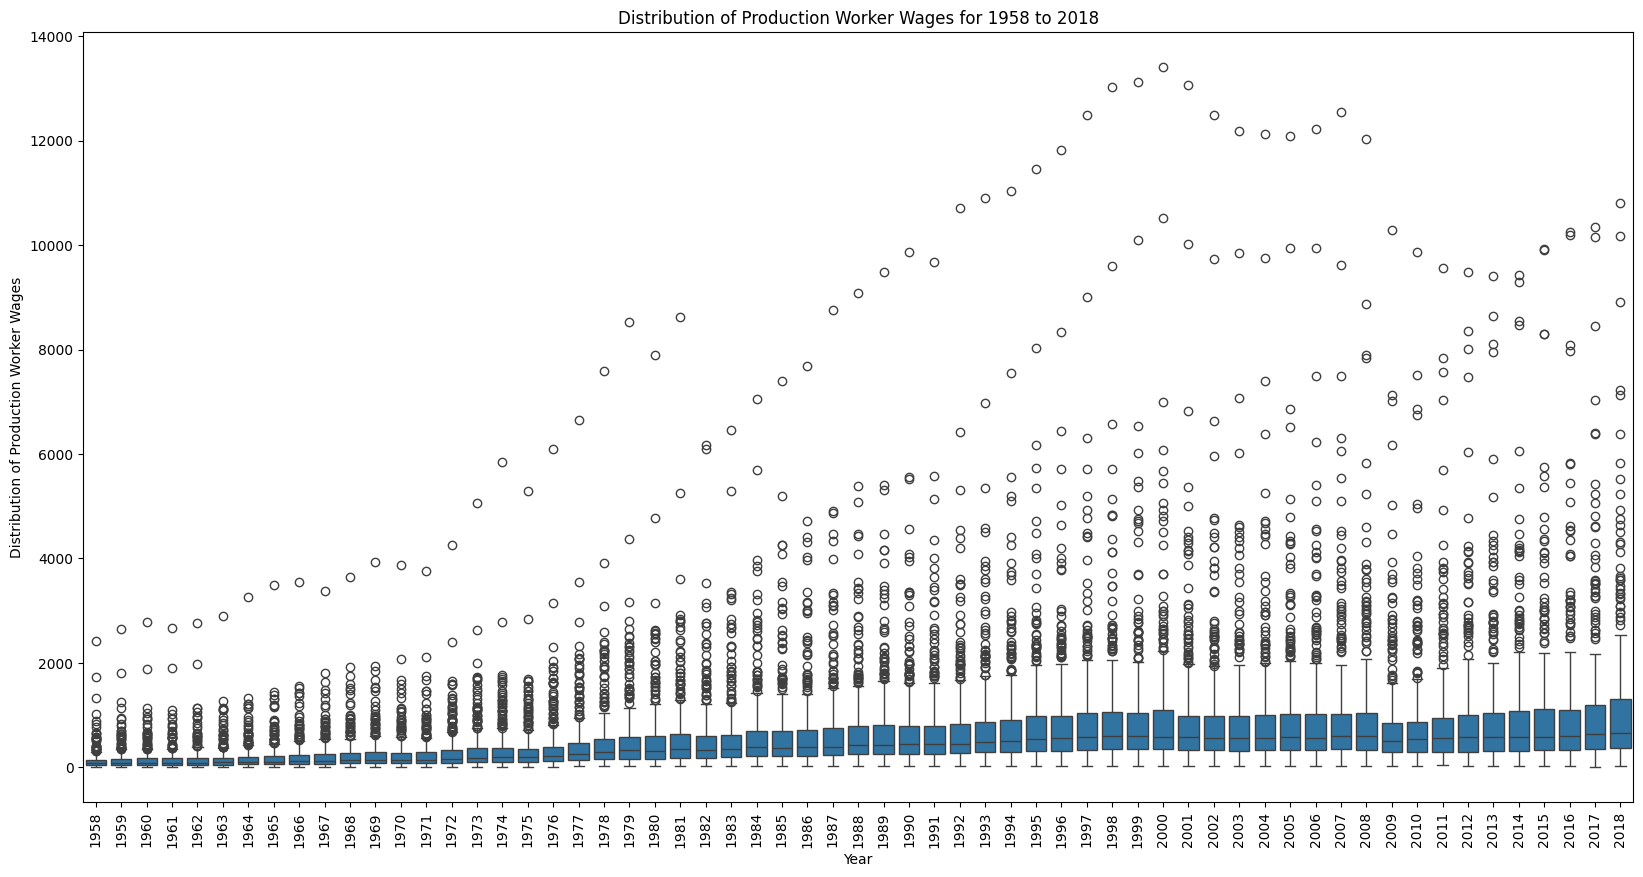

In [42]:
#Question 2.6 
#WORKED WITH WON CHOI ON THIS QUESTION
import matplotlib.pyplot as plt 
import seaborn as sns
dfbox = df[['year', 'prodw']]
#filtering by year of either 1958 or 2018 and production worker wages
plt.figure(figsize=(20,10))
sns.boxplot(x='year', y='prodw', data=dfbox)
plt.title('Distribution of Production Worker Wages for 1958 to 2018')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Distribution of Production Worker Wages')

In [28]:
#Question 2.7
df1990 = df[df['year'] == 1990][['NAICS Industry', 'prodh']]
df2000 = df[df['year'] == 2000][['NAICS Industry', 'prodh']]
#two df so I can compare the two years
combined_df = df1990.merge(df2000, on='NAICS Industry', suffixes=('_1990', '_2000'), how='outer')
#merging the two df on NAICS industry
combined_df['prodh_change'] = (combined_df['prodh_2000'] - combined_df['prodh_1990'])
#delta_production hour by 2000-1990
combined_df = combined_df.sort_values(by=['prodh_change'], ascending=False)
display( 'The industry with the highest production worker hours increase between 1990 and 2000 is', combined_df.head(1))

'The industry with the highest production worker hours increase between 1990 and 2000 is'

,NAICS Industry,prodh_1990,prodh_2000,prodh_change
146,All Other Plastics Product Manufacturing,629.9,869.4,239.5


In [30]:
#Question 2.8
df2015 = df[df['year'] == 2015]
df2015 = df2015.sort_values(by=['matcost'], ascending=False)
display('The industry with the highest total cost of materials in 2015 is', df2015.iloc[0]['NAICS Industry'])
display('the percentage of matcost relative to total value added was', df2015.iloc[0]['matcost'] / df2015.iloc[0]['vadd'] *100, '%')

'The industry with the highest total cost of materials in 2015 is'

'Petroleum Refineries'

'the percentage of matcost relative to total value added was'

432.4734652980857

'%'

Text(0.5, 1.0, 'Top 15 4-factor TFP index in 2010')

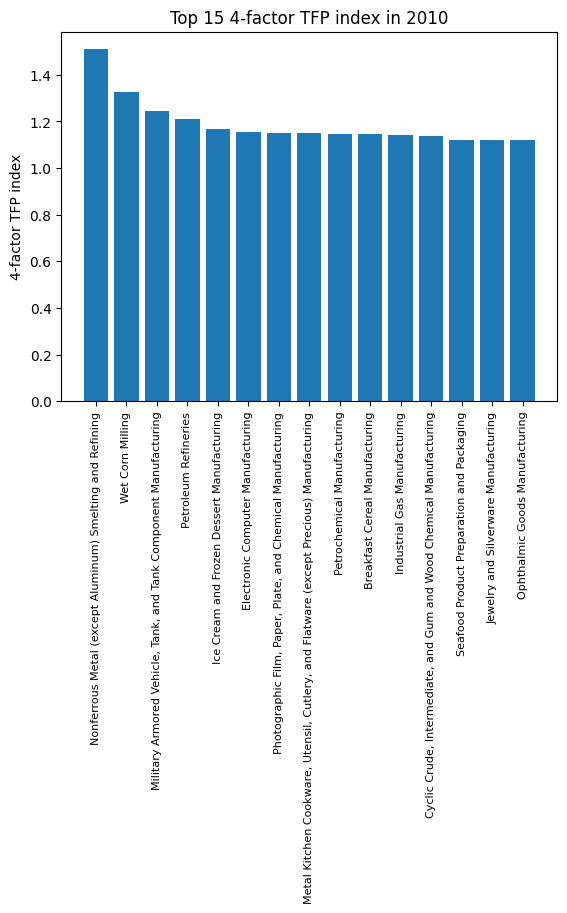

In [29]:
#Question 2.9
import matplotlib.pyplot as plt
df2010 = df[df['year'] == 2010][['NAICS Industry', 'tfp4']]
df2010 = df2010.sort_values(by='tfp4', ascending=False)
plt.bar(df2010.head(15)['NAICS Industry'], df2010.head(15)['tfp4'])
#top 15 only
plt.xticks(rotation=90, fontsize=8)
#rotating the x axis labels to make it easier to read
plt.ylabel('4-factor TFP index')
plt.title('Top 15 4-factor TFP index in 2010')


Text(0.5, 1.0, 'Distribution of total real capital stock')

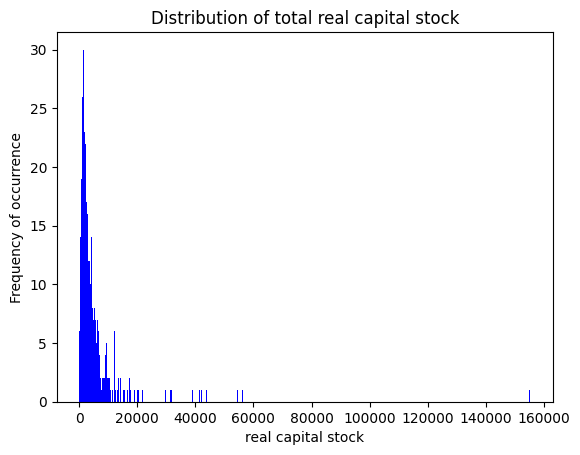

In [48]:
#Question 2.10 

import matplotlib.pyplot as plt
df2010 = df[df['year'] == 2010][['cap']]
df2010['cap'].plot.hist(bins=500,color='blue')
#historigram with 20 bins
plt.xlabel('real capital stock')
plt.ylabel('Frequency of occurrence')
plt.title('Distribution of total real capital stock')


In [32]:
#Question 2.11 
filtered_df = df[df['dtfp5'].notnull()]
df11 = filtered_df[filtered_df.groupby('NAICS Industry')['dtfp5'].transform('count') >= 20]
#filtering 
#I did this by ommiting all rows where dtfp5 was null
#and counting how many industries had more than 20 observations 
df11 = df11.groupby('NAICS Industry').mean()
df11.reset_index(inplace=True)
df11 = df11[['NAICS Industry', 'dtfp5']]
df11 = df11.sort_values(by=['dtfp5'], ascending=False)
display('The industry with the highest average 5-factor TFP growth rate is', df11.head(1))

'The industry with the highest average 5-factor TFP growth rate is'

,NAICS Industry,dtfp5
93,Electronic Computer Manufacturing,0.115086


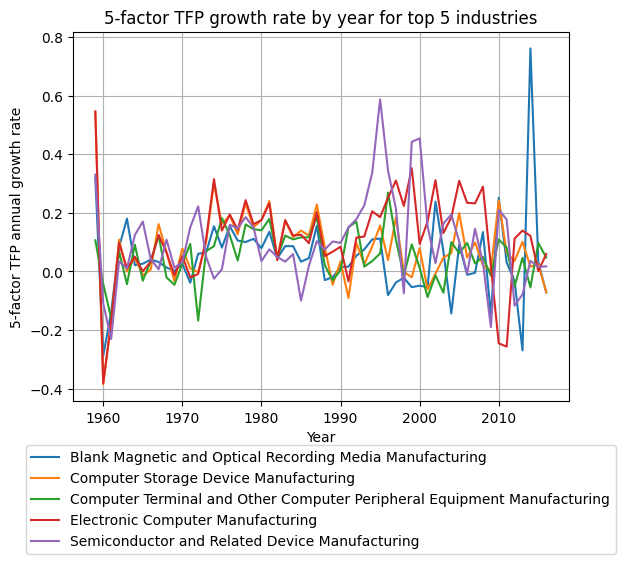

In [21]:
#Question 2.12 
import matplotlib.pyplot as plt 
df_top = df11.head(5)
df_top.head(5)
df12 = df.merge(df_top, on='NAICS Industry', how='inner')
df12 = df12[['year', 'NAICS Industry', 'dtfp5_x']]

for i, group in df12.groupby('NAICS Industry'):
    plt.plot(group['year'], group['dtfp5_x'], label=i)\
#plotting the top 5 industries on the same graph using the for loop

plt.xlabel('Year')
plt.ylabel('5-factor TFP annual growth rate')
plt.title('5-factor TFP growth rate by year for top 5 industries')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.grid(True)
plt.show()